In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline   

In [2]:
ratings_header = "UserID::MovieID::Rating::Timestamp".split("::")
users_header = "UserID::Gender::Age::Occupation::Zip-code".split("::")
movies_header = "MovieID::Title::Genres".split("::")

In [3]:
ratings = pd.read_table("ratings.dat",sep ="::",names=ratings_header)
movies = pd.read_table("movies.dat",sep ="::",names =movies_header)
users = pd.read_table("users.dat",sep = "::",names = users_header)

<ipython-input-3-83ea0b2af4d7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table("ratings.dat",sep ="::",names=ratings_header)
<ipython-input-3-83ea0b2af4d7>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_table("movies.dat",sep ="::",names =movies_header)
<ipython-input-3-83ea0b2af4d7>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table("users.dat",sep

In [4]:
print("MOVIES TABLE shape is",movies.shape)
movies

MOVIES TABLE shape is (3883, 3)


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
print("USERS TABLE shape is ",users.shape)
users

USERS TABLE shape is  (6040, 5)


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [6]:
print("RATINGS TABLE shape is",ratings.shape)
ratings.sort_values(by =["UserID","MovieID"],inplace = True)
ratings

RATINGS TABLE shape is (1000209, 4)


,UserID,MovieID,Rating,Timestamp
40,1,1,5,978824268
25,1,48,5,978824351
39,1,150,5,978301777
44,1,260,4,978300760
23,1,527,5,978824195
...,...,...,...,...
1000120,6040,3683,4,960971696
1000178,6040,3703,4,964828575
1000183,6040,3735,4,960971654
1000191,6040,3751,4,964828782


# 1.MERGING DATA INTO ONE DATA SET


In [7]:
movie_and_ratings = pd.merge(movies,ratings,on ="MovieID" )

In [8]:
movie_and_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


In [9]:
movie_and_ratings.shape

(1000209, 6)

In [10]:
master_ratings = pd.merge(movie_and_ratings,users,on= "UserID")

In [11]:
master_ratings.sort_values(by = ["UserID","MovieID"],inplace = True,ignore_index = True)

In [12]:
master_ratings

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3683,Blood Simple (1984),Drama|Film-Noir,6040,4,960971696,M,25,6,11106
1000205,3703,Mad Max 2 (a.k.a. The Road Warrior) (1981),Action|Sci-Fi,6040,4,964828575,M,25,6,11106
1000206,3735,Serpico (1973),Crime|Drama,6040,4,960971654,M,25,6,11106
1000207,3751,Chicken Run (2000),Animation|Children's|Comedy,6040,4,964828782,M,25,6,11106


Text(0.5, 0, "User's Age")

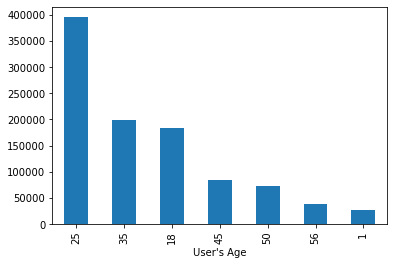

In [13]:
master_ratings["Age"].value_counts().plot.bar()
plt.xlabel("User's Age")

# 2.TOY STORY RATINGS

In [14]:
toy_story_ratings = master_ratings.loc[master_ratings["Title"] == "Toy Story (1995)"]  

In [15]:
rat = toy_story_ratings["Rating"].value_counts()
print("Users rating are as follows:")
k =int()
for i in range(1,6):
    print("\tno of {} star ratings are {}".format(i,rat[i]))
    k = k+i*rat[i]
print("Overall Average rating is %0.2f" %(k/rat.sum()))

Users rating are as follows:
	no of 1 star ratings are 16
	no of 2 star ratings are 61
	no of 3 star ratings are 345
	no of 4 star ratings are 835
	no of 5 star ratings are 820
Overall Average rating is 4.15


# 3.TOP 25 MOVIES BY VIEWERSHIP RATING

In [16]:
type(master_ratings)
titles = set(master_ratings["Title"])
titles = list(titles)

In [17]:
ratings_list = []
for i in titles:
    title_ratings_list = master_ratings.loc[master_ratings["Title"] == i]
    no_of_ratings = title_ratings_list["Rating"].value_counts()
    ratings_list.append(no_of_ratings.sum())

In [18]:
top_movies = pd.DataFrame({"no.of ratings":ratings_list,"movie title":titles})

In [19]:
top_movies

,no.of ratings,movie title
0,664,"Jungle Book, The (1967)"
1,626,Out of Africa (1985)
2,33,Once Upon a Time... When We Were Colored (1995)
3,13,Whatever Happened to Aunt Alice? (1969)
4,112,Air Bud (1997)
...,...,...
3701,206,Attack of the Killer Tomatoes! (1980)
3702,139,Poison Ivy (1992)
3703,426,Spartacus (1960)
3704,461,Key Largo (1948)


In [20]:
top_movies.sort_values("no.of ratings",ascending = False,inplace = True)

In [21]:
print("Top 25 Movies with most ratings from viewers")
top_movies.head(25)

Top 25 Movies with most ratings from viewers


,no.of ratings,movie title
478,3428,American Beauty (1999)
1353,2991,Star Wars: Episode IV - A New Hope (1977)
1818,2990,Star Wars: Episode V - The Empire Strikes Back...
3253,2883,Star Wars: Episode VI - Return of the Jedi (1983)
1846,2672,Jurassic Park (1993)
3417,2653,Saving Private Ryan (1998)
413,2649,Terminator 2: Judgment Day (1991)
429,2590,"Matrix, The (1999)"
3351,2583,Back to the Future (1985)
2166,2578,"Silence of the Lambs, The (1991)"


# 4.Ratings by user id 2696

In [22]:
ratings_by_2696 = master_ratings.loc[master_ratings["UserID"] == 2696] 

In [23]:
ratings_by_2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
440667,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
440668,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
440669,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
440670,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
440671,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
440672,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
440673,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
440674,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
440675,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
440676,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


# 5. genres

In [24]:
genres = list(master_ratings["Genres"])
genres_list = []
for i in range(len(genres)):
    k = genres[i].split("|")
    for i in k:
        genres_list.append(i)

In [25]:
genres_list = set(genres_list)
print("Unique Categories of genres are :",genres_list)

Unique Categories of genres are : {'Drama', 'War', "Children's", 'Musical', 'Animation', 'Action', 'Comedy', 'Crime', 'Documentary', 'Sci-Fi', 'Fantasy', 'Mystery', 'Romance', 'Western', 'Horror', 'Thriller', 'Film-Noir', 'Adventure'}


# 6.one hot encoding for genres

In [26]:
ohe_df =pd.DataFrame(master_ratings.iloc[:,2])
ohe_df
for i in genres_list:
    ohe_df[i] = ohe_df["Genres"].str.contains(i)*1

In [27]:
ohe_df

,Genres,Drama,War,Children's,Musical,Animation,Action,Comedy,Crime,Documentary,Sci-Fi,Fantasy,Mystery,Romance,Western,Horror,Thriller,Film-Noir,Adventure
0,Animation|Children's|Comedy,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Animation|Children's|Musical|Romance,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Drama,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Action|Adventure|Fantasy|Sci-Fi,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,Drama|War,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,Drama|Film-Noir,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1000205,Action|Sci-Fi,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1000206,Crime|Drama,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1000207,Animation|Children's|Comedy,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


# 7 .Features effecting ratings of toy story movie

In [28]:
toy_story_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
452,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
554,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
693,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
799,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [29]:
co_re = toy_story_ratings.corr()
co_re.style.background_gradient(cmap = "coolwarm")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,MovieID,UserID,Rating,Timestamp,Age,Occupation
MovieID,nan,nan,nan,nan,nan,nan
UserID,nan,1.000000,0.007813,-0.660485,0.035365,0.009303
Rating,nan,0.007813,1.000000,0.004136,0.046936,-0.032750
Timestamp,nan,-0.660485,0.004136,1.000000,-0.015260,0.015927
Age,nan,0.035365,0.046936,-0.015260,1.000000,0.080612
Occupation,nan,0.009303,-0.032750,0.015927,0.080612,1.000000


In [30]:
m = []
f = []
for i in [1,2,3,4,5]:
    ratings_l = toy_story_ratings.loc[toy_story_ratings["Rating"] == i]   
    k = ratings_l["Gender"].value_counts()
    m.append(k["M"])
    f.append(k["F"])
print(m)
print(f)

[10, 45, 253, 611, 567]
[6, 16, 92, 224, 253]


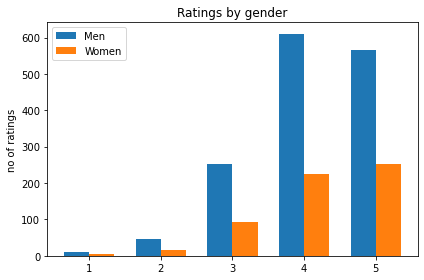

In [31]:
labels = ['1', '2', '3', '4', '5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, m, width, label='Men')
rects2 = ax.bar(x + width/2, f, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('no of ratings')
ax.set_title('Ratings by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# 8.1 Multiple Linear regression

In [32]:
final_ratings = pd.merge(master_ratings,ohe_df,left_index = True, right_index = True)
rating_Df = final_ratings["Rating"].values
for i in ["M","F"]:
    final_ratings[i] = final_ratings["Gender"].str.contains(i)*1

In [33]:
final_ratings.drop(["Genres_x","Genres_y","Rating","Gender","Zip-code","Title"],axis = 1,inplace = True)
final_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 25 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   MovieID      1000209 non-null  int64
 1   UserID       1000209 non-null  int64
 2   Timestamp    1000209 non-null  int64
 3   Age          1000209 non-null  int64
 4   Occupation   1000209 non-null  int64
 5   Drama        1000209 non-null  int32
 6   War          1000209 non-null  int32
 7   Children's   1000209 non-null  int32
 8   Musical      1000209 non-null  int32
 9   Animation    1000209 non-null  int32
 10  Action       1000209 non-null  int32
 11  Comedy       1000209 non-null  int32
 12  Crime        1000209 non-null  int32
 13  Documentary  1000209 non-null  int32
 14  Sci-Fi       1000209 non-null  int32
 15  Fantasy      1000209 non-null  int32
 16  Mystery      1000209 non-null  int32
 17  Romance      1000209 non-null  int32
 18  Western      1000209 non-null  int32
 19  

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(final_ratings,rating_Df,test_size = 0.025,random_state = 2)

In [35]:
type(Y_train)

numpy.ndarray

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [38]:
Y_pred = regressor.predict(X_test)
Y_pred = [int(round(num)) for num in Y_pred]
Y_pred = np.array(Y_pred)
Y_pred

array([4, 3, 4, ..., 3, 3, 4])

In [39]:
print(np.concatenate((Y_test.reshape(-1,1),Y_pred.reshape(-1,1)),1))

[[5 4]
 [4 3]
 [4 4]
 ...
 [3 3]
 [5 3]
 [2 4]]


In [40]:
print(regressor.intercept_)
print(regressor.coef_)

3.58136716150381
[-6.10758476e-02 -4.69830736e-03 -2.85766334e-02  4.70086635e-02
  7.33918069e-03  1.06848114e-01  6.87716266e-02 -9.00316851e-02
  2.75791717e-02  7.75002861e-02 -4.44815707e-02 -6.07644893e-03
  2.12860600e-02  3.48651746e-02 -1.10502659e-02  1.28706888e-02
  7.55677207e-04 -1.24330294e-02  1.44001568e-02 -7.62844079e-02
  1.75871593e-02  5.69857209e-02 -1.48343502e-03  7.56122244e+10
  7.56122244e+10]


In [41]:
from sklearn.metrics import accuracy_score as a_s
a_s(Y_test,Y_pred)

0.33355994561305286

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[   0    0  758  632    0]
 [   0    0 1284 1399    0]
 [   0    0 2599 3828    0]
 [   0    0 3072 5742    0]
 [   0    0 1661 4031    0]]


In [43]:
from sklearn.metrics import mean_absolute_error as me
me(Y_test,Y_pred)

0.8696712788930656

# 8 .2 KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier =  KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [45]:
Y_pred_0 = classifier.predict(X_test)

In [46]:
Y_pred_0 = [int(round(num)) for num in Y_pred_0]
Y_pred_0 = np.array(Y_pred)

In [47]:
Y_pred_0

array([4, 3, 4, ..., 3, 3, 4])

In [48]:
print(np.concatenate((Y_test.reshape(-1,1),Y_pred_0.reshape(-1,1)),1))

[[5 4]
 [4 3]
 [4 4]
 ...
 [3 3]
 [5 3]
 [2 4]]


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_0)
print(cm)

[[   0    0  758  632    0]
 [   0    0 1284 1399    0]
 [   0    0 2599 3828    0]
 [   0    0 3072 5742    0]
 [   0    0 1661 4031    0]]


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_0)

0.33355994561305286

In [51]:
from sklearn.metrics import mean_absolute_error as me
me(Y_test,Y_pred_0)

0.8696712788930656

# 8.3 Naive bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier_1 =  GaussianNB()
classifier_1.fit(X_train,Y_train)

GaussianNB()

In [53]:
Y_pred_1 = classifier_1.predict(X_test)
Y_pred_1 

array([3, 3, 3, ..., 1, 1, 4], dtype=int64)

In [54]:
print(np.concatenate((Y_test.reshape(-1,1),Y_pred_1.reshape(-1,1)),1))

[[5 3]
 [4 3]
 [4 3]
 ...
 [3 1]
 [5 1]
 [2 4]]


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_1)
print(cm)

[[ 313  206  425  324  122]
 [ 400  378  926  701  278]
 [ 751  812 2101 1987  776]
 [ 738 1011 2610 3019 1436]
 [ 467  552 1453 1996 1224]]


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_1)

0.2813324802047509

# 8.4 decision making tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier_2 =  DecisionTreeClassifier()
classifier_2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
Y_pred_2 = classifier_2.predict(X_test)
Y_pred_2

array([3, 3, 4, ..., 2, 3, 2], dtype=int64)

In [59]:
print(np.concatenate((Y_test.reshape(-1,1),Y_pred_2.reshape(-1,1)),1))

[[5 3]
 [4 3]
 [4 4]
 ...
 [3 2]
 [5 3]
 [2 2]]


In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_2)
print(cm)

[[ 273  267  384  333  133]
 [ 296  506  805  757  319]
 [ 564  947 1987 2004  925]
 [ 627 1061 2463 2965 1698]
 [ 378  592 1385 1902 1435]]


In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_2)

0.28657122290650244

# 8.5 Random forest

In [62]:
#FITTING INTO MODEL
from sklearn.ensemble import RandomForestClassifier
classifier_3 =  RandomForestClassifier(n_estimators = 12)
classifier_3.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=12)

In [63]:
Y_pred_3 = classifier_3.predict(X_test)
Y_pred_3

array([5, 4, 4, ..., 1, 3, 3], dtype=int64)

In [64]:
print(np.concatenate((Y_test.reshape(-1,1),Y_pred_3.reshape(-1,1)),1))

[[5 5]
 [4 4]
 [4 4]
 ...
 [3 1]
 [5 3]
 [2 3]]


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred_3)
print(cm)

[[ 314  219  415  335  107]
 [ 222  447  928  836  250]
 [ 361  713 2300 2275  778]
 [ 277  685 2480 3853 1519]
 [ 175  294 1165 2318 1740]]


In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred_3)

0.34607694153403185